## Introduction

Here we present 2D What If plots.

First, an example for regression model.

In [3]:
library("DALEX")
library("ceterisParibus")
library("randomForest")
set.seed(59)

apartments_rf_model <- randomForest(m2.price ~ construction.year + surface + floor + no.rooms + district, data = apartments)

explainer_rf <- explain(apartments_rf_model,
      data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)

new_apartment <- apartmentsTest[1, ]
new_apartment

,m2.price,construction.year,surface,floor,no.rooms,district
1001,4644,1976,131,3,5,Srodmiescie


In [4]:
wi_rf_2d <- what_if_2d(explainer_rf, observation = new_apartment)
wi_rf_2d

y_hat,new_x1,new_x2,vname1,vname2,label
4899.536,1920,20.0,construction.year,surface,randomForest
4896.920,1920,21.3,construction.year,surface,randomForest
4900.060,1920,22.6,construction.year,surface,randomForest
4900.187,1920,23.9,construction.year,surface,randomForest
4901.809,1920,25.2,construction.year,surface,randomForest
4896.952,1920,26.5,construction.year,surface,randomForest
4896.699,1920,27.8,construction.year,surface,randomForest
4893.400,1920,29.1,construction.year,surface,randomForest
4898.892,1920,30.4,construction.year,surface,randomForest
4891.772,1920,31.7,construction.year,surface,randomForest


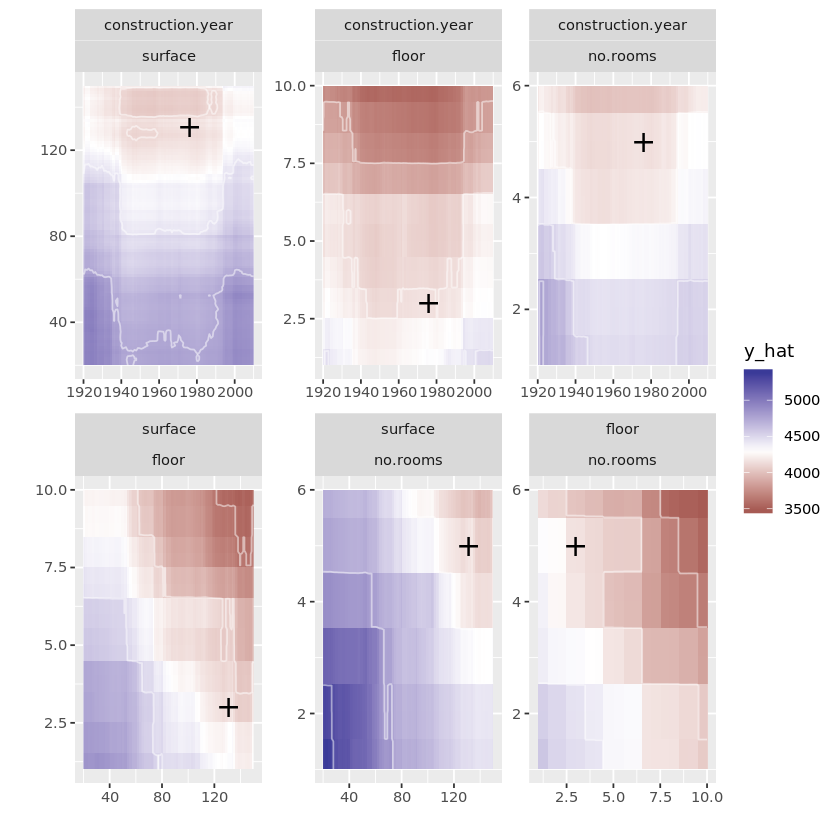

In [5]:
plot(wi_rf_2d)

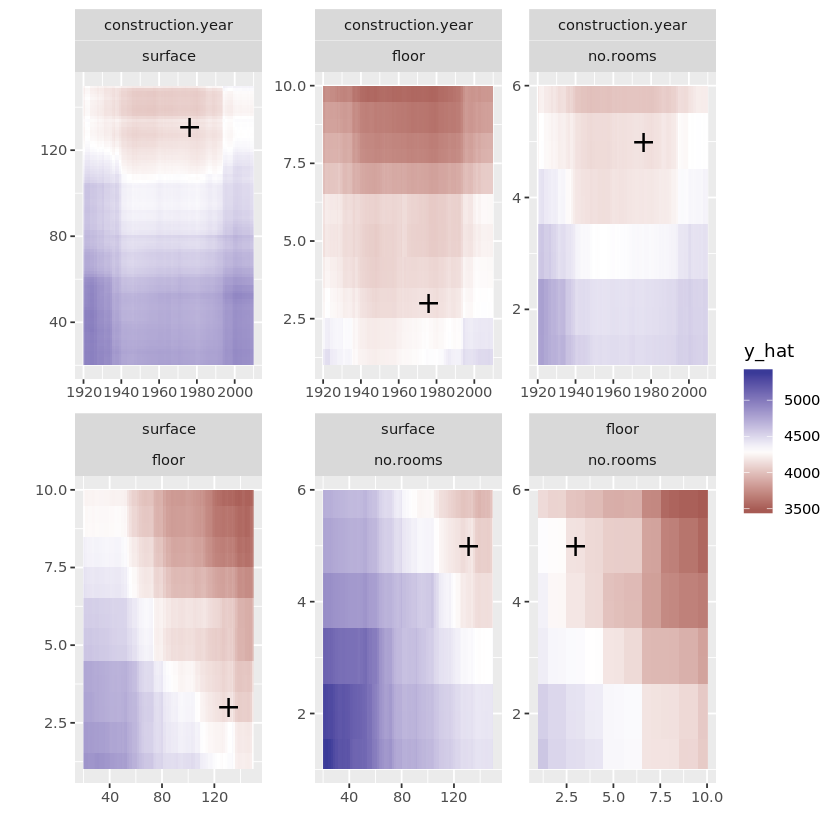

In [6]:
plot(wi_rf_2d, add_contour = FALSE)

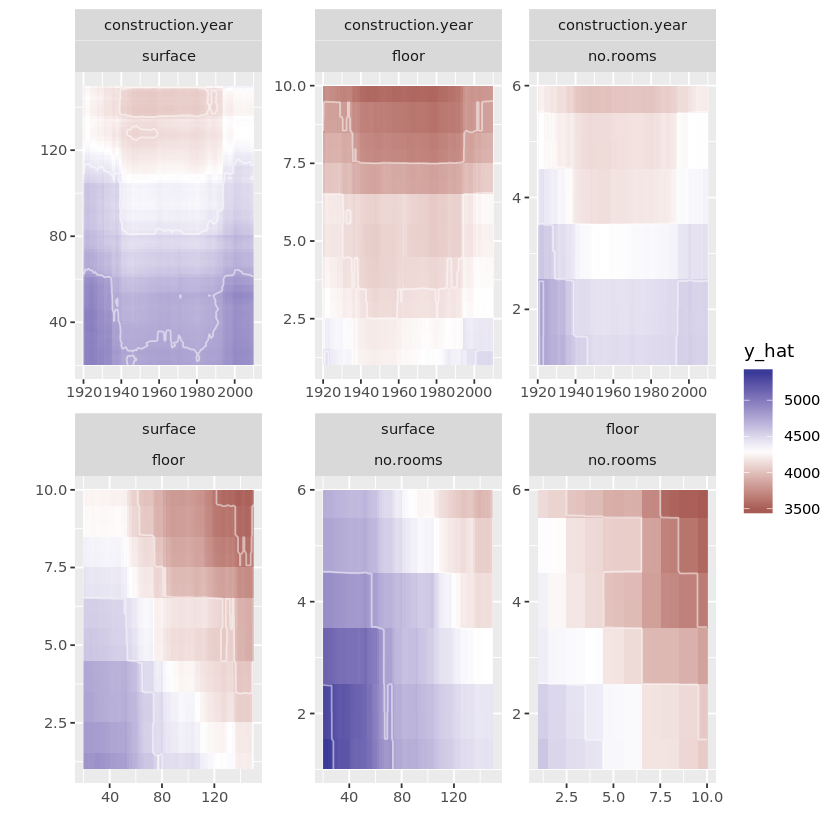

In [7]:
plot(wi_rf_2d, add_observation = FALSE)

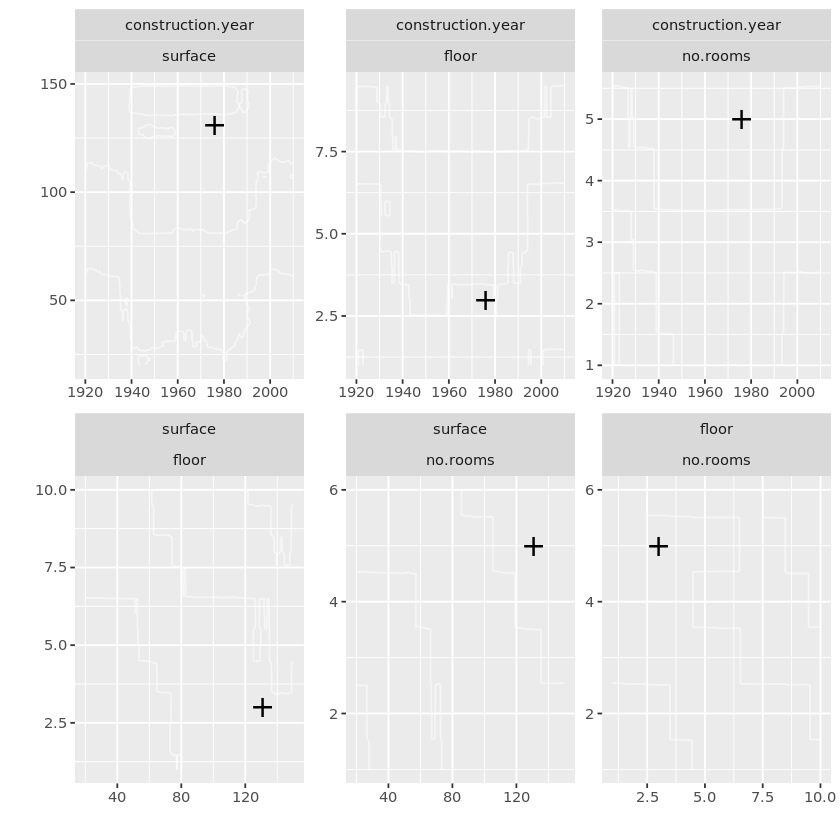

In [8]:
plot(wi_rf_2d, add_raster = FALSE)

And an example for classification.

In [9]:
# HR data
model <- randomForest(status ~ gender + age + hours + evaluation + salary, data = HR)
pred1 <- function(m, x)   predict(m, x, type = "prob")[,1]
explainer_rf_fired <- explain(model, data = HR[,1:5],
   y = HR$status == "fired",
   predict_function = pred1, label = "fired")

new_emp <- HR[1, ]
new_emp

gender,age,hours,evaluation,salary,status
male,32.58267,41.88626,3,1,fired


In [10]:
wi_rf_2d <- what_if_2d(explainer_rf_fired, observation = new_emp)
wi_rf_2d

,y_hat,new_x1,new_x2,vname1,vname2,label
1,0.472,20.00389,35.00000,age,hours,fired
1.1,0.524,20.00389,35.44978,age,hours,fired
1.2,0.582,20.00389,35.89955,age,hours,fired
1.3,0.570,20.00389,36.34933,age,hours,fired
1.4,0.540,20.00389,36.79911,age,hours,fired
1.5,0.582,20.00389,37.24889,age,hours,fired
1.6,0.608,20.00389,37.69866,age,hours,fired
1.7,0.614,20.00389,38.14844,age,hours,fired
1.8,0.620,20.00389,38.59822,age,hours,fired
1.9,0.628,20.00389,39.04799,age,hours,fired


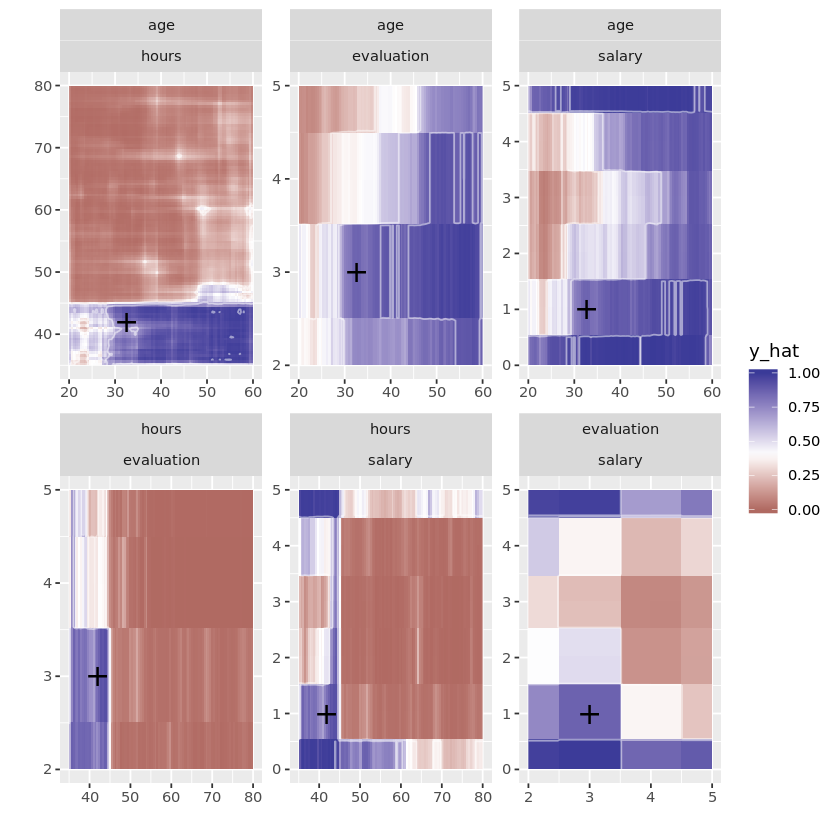

In [11]:
plot(wi_rf_2d)